In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
data_test = pd.read_csv('datasets/segmentation/test.csv')
data_train = pd.read_csv('datasets/segmentation/train.csv')

In [3]:
data_test.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B


In [4]:
data_train.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [5]:
# Eğitim ve test setlerini birleştirelim.
data = pd.concat([data_train, data_test], axis=0, ignore_index=True)
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# Veri Analizi

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10695.0,463468.088640,2600.966411,458982.0,461220.5,463451.0,465733.5,467974.0
Age,10695.0,43.511828,16.774158,18.0,30.0,41.0,53.0,89.0
Work_Experience,9597.0,2.619777,3.390790,0.0,0.0,1.0,4.0,14.0
Family_Size,10247.0,2.844052,1.536427,1.0,2.0,3.0,4.0,9.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [8]:
data.var(numeric_only=True)

ID                 6.765026e+06
Age                2.813724e+02
Work_Experience    1.149745e+01
Family_Size        2.360609e+00
dtype: float64

In [9]:
data.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


In [10]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

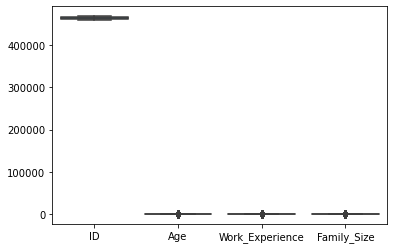

In [11]:
sns.boxplot(data=data);

In [12]:
print(data['Profession'].unique(), '--------  Class Count:', len(data['Profession'].unique()))
print(data['Var_1'].unique(), '-------  Class Count:', len(data['Var_1'].unique()))
print(data['Segmentation'].unique(), '------------  Class Count: ', len(data['Segmentation'].unique()))

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan] --------  Class Count: 10
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5'] -------  Class Count: 8
['D' 'A' 'B' 'C'] ------------  Class Count:  4


In [13]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

38
0


# Veri Görselleştirme

In [14]:
data.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


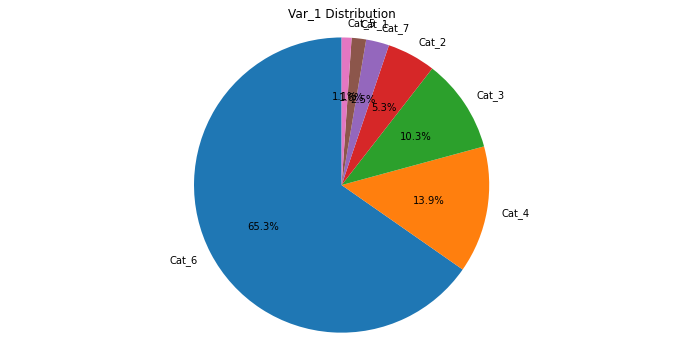

In [15]:
var1_counts = data["Var_1"].value_counts()
plt.figure(figsize=(12,6))
plt.pie(var1_counts, labels=var1_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Var_1 Distribution")
plt.axis('equal')
plt.show()

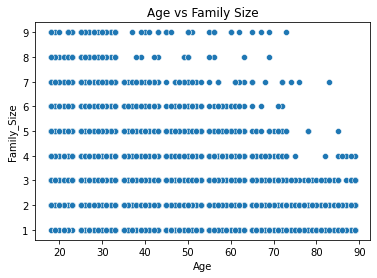

In [16]:
sns.scatterplot(data=data, x="Age", y="Family_Size")
plt.title("Age vs Family Size")
plt.show()

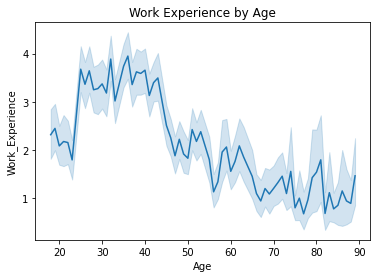

In [17]:
sns.lineplot(data=data, x="Age", y="Work_Experience")
plt.title("Work Experience by Age")
plt.show()

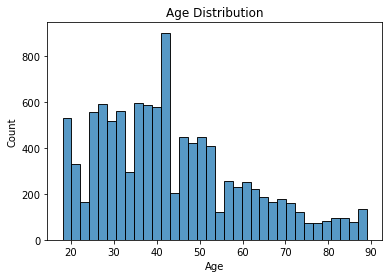

In [18]:
sns.histplot(data=data, x="Age")
plt.title("Age Distribution")
plt.show()

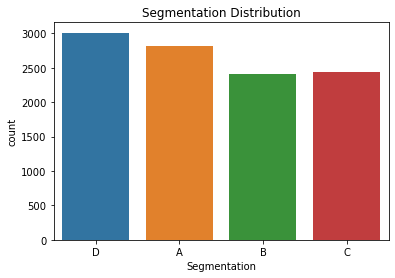

In [19]:
sns.countplot(data=data, x="Segmentation")
plt.title("Segmentation Distribution")
plt.show()

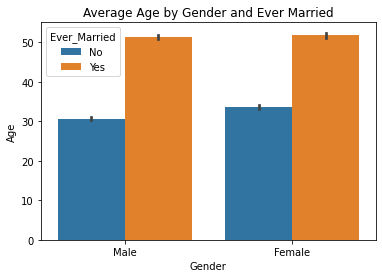

In [20]:
sns.barplot(data=data, x="Gender", y="Age", hue="Ever_Married")
plt.title("Average Age by Gender and Ever Married")
plt.show()

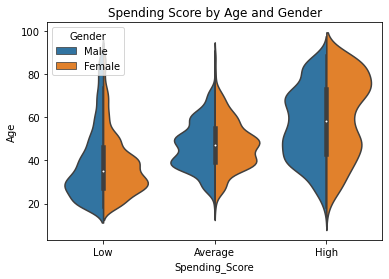

In [21]:
sns.violinplot(data=data, x="Spending_Score", y="Age", hue="Gender", split=True)
plt.title("Spending Score by Age and Gender")
plt.show()

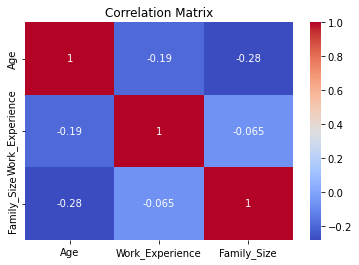

In [22]:
numeric_columns = ["Age", "Work_Experience", "Family_Size"]
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Veri Ön İşleme

In [23]:
data.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [24]:
data['Profession'].unique()
data['Profession'] = data['Profession'].map({
    'Healthcare':0, 'Engineer':1, 'Lawyer':2, 'Entertainment':3,
    'Artist':4, 'Executive':5, 'Doctor':6, 'Marketing':7, 'Homemaker':8
})
data['Spending_Score'] = data['Spending_Score'].map({'Low':0, 'Average':1, 'High':2})
data['Var_1'] = data['Var_1'].map({'Cat_1':0, 'Cat_2':1, 'Cat_3':2, 'Cat_4':3, 'Cat_5':4, 'Cat_6':5, 'Cat_7':6})
data['Segmentation'] = data['Segmentation'].map({'A':0, 'B':1, 'C':2, 'D':3})
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data['Ever_Married'] = data['Ever_Married'].map({'No':0, 'Yes':1})
data['Graduated'] = data['Graduated'].map({'No':0, 'Yes':1})

In [25]:
data.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0.0,22,0.0,0.0,1.0,0,4.0,3.0,3
1,462643,1,1.0,38,1.0,1.0,NaN,1,3.0,3.0,0


In [26]:
imputer = SimpleImputer(strategy='mean')
data['Ever_Married'] = imputer.fit_transform(data['Ever_Married'].values.reshape(-1, 1))
data['Graduated'] = imputer.fit_transform(data['Graduated'].values.reshape(-1, 1))
data['Profession'] = imputer.fit_transform(data['Profession'].values.reshape(-1, 1))
data['Work_Experience'] = imputer.fit_transform(data['Work_Experience'].values.reshape(-1, 1))
data['Family_Size'] = imputer.fit_transform(data['Family_Size'].values.reshape(-1, 1))
data['Var_1'] = imputer.fit_transform(data['Var_1'].values.reshape(-1, 1))

data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [27]:
scaler = StandardScaler()
for element in data.columns: 
    if element != str('Segmentation'): 
        data[element] = scaler.fit_transform(data[element].values.reshape(-1, 1))

In [28]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,-0.252687,-0.911474,-1.202968,-1.284406,-1.284571,-1.534414,-0.505230,-0.733920,0.768707,-0.803935,3
1,-0.316533,1.097124,0.846286,-0.330253,0.785844,-1.066624,0.000000,0.616690,0.103862,-0.803935,0
2,1.095771,1.097124,0.846286,1.399148,0.785844,-1.066624,-0.505230,-0.733920,-1.225828,0.611167,1
3,-0.665763,-0.911474,0.846286,1.399148,0.785844,-0.598834,-0.816268,1.967301,-0.560983,0.611167,1
4,-0.306533,1.097124,0.846286,-0.210984,0.785844,-0.131044,0.000000,1.967301,2.098397,0.611167,0


# Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [30]:
X = data.drop(['ID', 'Segmentation'], axis=1)
y = data['Segmentation']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_test[0:2]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
1350,1.097124,-1.202968,-1.105502,-1.284571,-1.066624,-0.50523,-0.73392,0.103862,0.611167
2012,-0.911474,-1.202968,-0.091715,0.785844,-0.131044,-0.50523,-0.73392,-1.225828,0.611167


In [33]:
y_train[0:2], y_test[0:2]

(8090    0
 2858    2
 Name: Segmentation, dtype: int64,
 1350    3
 2012    0
 Name: Segmentation, dtype: int64)

In [34]:
models = {
    'Logisticregression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
}

for name, model in models.items():
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'{name}: Accuracy Score -> {accuracy}')

Logisticregression: Accuracy Score -> 0.43198874296435275
DecisionTreeClassifier: Accuracy Score -> 0.3883677298311445
RandomForestClassifier: Accuracy Score -> 0.43855534709193245
GradientBoostingClassifier: Accuracy Score -> 0.49624765478424016
XGBClassifier: Accuracy Score -> 0.46153846153846156
LGBMClassifier: Accuracy Score -> 0.47654784240150094
MLPClassifier: Accuracy Score -> 0.46810506566604126
KNeighborsClassifier: Accuracy Score -> 0.40384615384615385


In [35]:
random_states = [0, 10, 20, 42, 60, 80, 100]
for element in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=element)
    model = GradientBoostingClassifier().fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'Accuracy Score: {accuracy} for random_state={element}')

Accuracy Score: 0.4817073170731707 for random_state=0
Accuracy Score: 0.4906191369606004 for random_state=10
Accuracy Score: 0.50093808630394 for random_state=20
Accuracy Score: 0.49624765478424016 for random_state=42
Accuracy Score: 0.4723264540337711 for random_state=60
Accuracy Score: 0.4845215759849906 for random_state=80
Accuracy Score: 0.4732645403377111 for random_state=100


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model = GradientBoostingClassifier().fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
report = classification_report(y_test, pred)
print('Accuracy Score: ', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)

Accuracy Score:  0.50093808630394
Confusion Matrix:
 [[258  82  83 141]
 [137 133 128  57]
 [ 75  92 277  69]
 [135  36  29 400]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.46      0.44       564
           1       0.39      0.29      0.33       455
           2       0.54      0.54      0.54       513
           3       0.60      0.67      0.63       600

    accuracy                           0.50      2132
   macro avg       0.49      0.49      0.49      2132
weighted avg       0.49      0.50      0.50      2132



In [37]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [41]:
params = {
    'learning_rate': [0.1, 1.0],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]

}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5).fit(X_train, y_train)
best_params = grid.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [42]:
model = GradientBoostingClassifier(**best_params).fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.5014071294559099


In [43]:
scores = cross_val_score(model, X, y, cv=10)
print('Scores: ', scores)
print('Mean of Scores: ', scores.mean())

Scores:  [0.53095685 0.53470919 0.51219512 0.53095685 0.52251407 0.55065666
 0.5272045  0.45915493 0.32112676 0.34084507]
Mean of Scores:  0.4830320006341992
